## EDA for 1000 Movies Data


### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Dataset & Source](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
    - 2.1 [Importing Packages](#section201)</br>
    - 2.2 [Loading Dataset](#section202)</br>
    - 2.3 [Description](#section203)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [Head](#section301)<br/>
    - 3.2 [Tail](#section302)<br/>
    - 3.3 [Information of dataset](#section303)<br/>
    - 3.4 [Description of Dataset](#section304)<br/>
    - 3.5 [Sample of Dataset](#section305)<br/>
    - 3.6 [Pandas Profiling](#section306)<br/>
    - 3.7 [Initial observations](#section307)<br/>
- 4. [Data Preprocessing](#section4)</br>
    - 4.1 [Dropping Column](#section401)<br/>
    - 4.2 [Checking for Duplicates](#section402)<br/>
    - 4.3 [ Missing values & its imputation](#section403)<br/>
    - 4.4 [Pandas profiling after Data Processing](#section404)<br/>            
- 5. [Exploratory Data Analysis](#section5)</br>
    - 5.1 [Highest Number of Movies Released](#section501)<br/>
    - 5.2 [Movie wkith Highest and Lowest Earned Revenue](#section502)<br/>
    - 5.3 [Movie with Longest and Shortest Runtime](#section503)<br/>
    - 5.4 [Movie with Highest Rating](#section504)<br/>
    - 5.5 [Highest Revenue generated in a year](#section505)<br/>
    - 5.6 [Director whose movies have generated highest Revenues](#section506)<br/>
    - 5.7 [Director who has directed highest number of movies](#section507)<br/>
    - 5.8 [Correlations between Ranks, Votes & Metascore](#section508)<br/>
    - 5.9 [Top 5 Genre wise movie released in the year (2006-2016)](#section509)<br/>
    - 5.10 [Genre wise popularity over the years](#section510)<br/>
- 6. [Conclusions](#section6)</br>
- 7. [Actionable insights](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement 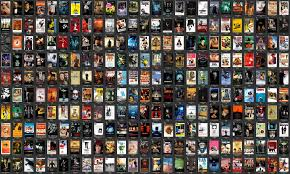


Based on the massive movie information, it would be interesting to understand what are the important factors that make a movie more successful than others. So, we would like to analyze what kind of movies are more successful, in other words, get higher IMDB score. We also want to show the results of this analysis in an intuitive way by visualizing outcome.

<a id=section101></a> 
### 1.1. Introduction
In this project, we take IMDB scores as response variable and focus on operating predictions by analyzing the rest of variables in the IMDB 1000 movie data. The results can help film companies to understand the secret of generating a commercial success movie.

<a id=section102></a> 
### 1.2. Dataset & Source
The data source is taken from Github provided by Insaid in term 1 & 2 project guidlines.

This dataset is a collection of details about the 1000 movies released in between 2006 - 2016 (source IMDB database) having 1000 rows and 12 columns


<a id=section2></a> 
## 2. Load the packages and data 

In [1]:
!pip install pandas-profiling==2.2.0 --upgrade


Requirement already up-to-date: pandas-profiling==2.2.0 in d:\anaconda\lib\site-packages (2.2.0)


<a id=section201></a> 
### 2.1. Importing Packages

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.display import display

<a id=section202></a> 
### 2.2. Loading Dataset

In [65]:
md = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")
md

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


<a id=section203></a> 
### 2.3. Description of the Dataset


| Column Name                    | Description                                                    |
| -------------------------------|:---------------------------------------------------------------| 
| Rank                           | Ranking of movies.                                             | 
| Title                          | Title of the movie.                                            |                            | Genre                          | Category of the movie.                                         |                             
| Description                    | Detailed description of the movie.                             | 
| Director                       | Director of the movie.                                         |
| Actor                          | Actor of the movie.                                            |
| Year                           | In Which year movie is released                                |                            | Runtime                        | The duration of the movie in minutes.                          |
| Rating                         | Ratings given by users for the movie                           | 
| Votes                          | Number of votes received by a movie                            | 
| Revenue                        | Revenue generated by movie in millions.                        |
| Metascore	                     | Score given by Critics based on Quality and content of movie   |                                                                                    

<a id=section3></a> 
## 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 
### 3.1. Head

In [66]:
md.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section302></a> 
### 3.2. Tail

In [67]:
md.tail()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


<a id=section303></a> 
### 3.3. Information of Dataset

In [68]:
<a id=section3></a> md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


<a id=section304></a> 
### 3.4. Description of Dataset

In [69]:
md.describe(include = 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",Two friends are searching for their long lost ...,Ridley Scott,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


<a id=section305></a> 
### 3.5. Sample of Dataset

In [70]:
md.sample(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
513,514,Bone Tomahawk,"Adventure,Drama,Horror",Four men set out in the Wild West to rescue a ...,S. Craig Zahler,"Kurt Russell, Patrick Wilson, Matthew Fox, Ric...",2015,132,7.1,47289,66.01,72.0
287,288,Jupiter Ascending,"Action,Adventure,Sci-Fi",A young woman discovers her destiny as an heir...,Lana Wachowski,"Channing Tatum, Mila Kunis,Eddie Redmayne, Sea...",2015,127,5.3,150121,47.38,40.0
333,334,Lincoln,"Biography,Drama,History","As the War continues to rage, America's presid...",Steven Spielberg,"Daniel Day-Lewis, Sally Field, David Strathair...",2012,150,7.4,207497,182.20,86.0
570,571,The Other Woman,"Comedy,Romance","After discovering her boyfriend is married, Ca...",Nick Cassavetes,"Cameron Diaz, Leslie Mann, Kate Upton, Nikolaj...",2014,109,6.0,110825,83.91,39.0
110,111,The Belko Experiment,"Action,Horror,Thriller","In a twisted social experiment, 80 Americans a...",Greg McLean,"John Gallagher Jr., Tony Goldwyn, Adria Arjona...",2016,89,6.3,3712,10.16,44.0
299,300,There Will Be Blood,"Drama,History","A story of family, religion, hatred, oil and m...",Paul Thomas Anderson,"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Mart...",2007,158,8.1,400682,40.22,92.0
327,328,A Street Cat Named Bob,"Biography,Comedy,Drama",Based on the international best selling book. ...,Roger Spottiswoode,"Luke Treadaway, Bob the Cat, Ruta Gedmintas, J...",2016,103,7.4,12643,0.04,54.0
825,826,Crawlspace,"Horror,Thriller",A thriller centered around a widower who moves...,Phil Claydon,"Michael Vartan, Erin Moriarty, Nadine Velazque...",2016,88,5.3,1427,NaN,25.0
529,530,The Bourne Legacy,"Action,Adventure,Mystery",An expansion of the universe from Robert Ludlu...,Tony Gilroy,"Jeremy Renner, Rachel Weisz, Edward Norton, Sc...",2012,135,6.7,245374,113.17,61.0
731,732,Paul,"Adventure,Comedy,Sci-Fi",Two British comic-book geeks traveling across ...,Greg Mottola,"Simon Pegg, Nick Frost, Seth Rogen, Mia Stallard",2011,104,7.0,201707,37.37,57.0


<a id=section306></a> 
### 3.6. Pandas Profiling

In [9]:
import pandas_profiling 

profile = pandas_profiling.ProfileReport(md)

In [10]:
profile.to_file("md_pre_profiling.html")    

In [71]:
# Finding the number of missing values
md.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<a id=section307></a> 
### 3.7. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Rank</strong>, <strong>Year</strong>, <strong>Runtime</strong>, <strong>Ratings</strong>, <strong>Votes</strong>, <strong>Revenue</strong>, <strong>Metascores</strong>
 - <em>Object</em>: <strong>Title</strong>, <strong>Genre</strong>,<strong>Directors</strong>, <strong>Actors</strong>, <strong>Description</strong>
- <strong>Revenue</strong> has 128 missing values. 
- <strong>Metascores</strong> has 64 missing values.
   - There are total sample of <strong>1000 (rows)</strong> & <strong>12 columns</strong>.
   - There are <strong>7 columns</strong> with a <strong>numeric</strong> datatype and <strong>5 columns</strong> with an <strong>object</strong> datatype.



In [22]:
cat_cols = list(md.select_dtypes(include='object').columns)
num_cols = list(md.select_dtypes(exclude='object').columns)

print(f'Categorical columns: {cat_cols}')
print(f'Continuous columns: {num_cols}')


Categorical columns: ['Title', 'Genre', 'Director', 'Actors']
Continuous columns: ['Rank', 'Year', 'Runtime_(Minutes)', 'Rating', 'Votes', 'Revenue_(Millions)', 'Metascore']


In [37]:
# Calculating missing value in percentage
total = md.isnull().sum().sort_values(ascending=False)
percent = ((md.isnull().sum()/md.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)
print(missing_data)



                    Total  Percent
Revenue (Millions)    128     12.8
Metascore              64      6.4
Votes                   0      0.0
Rating                  0      0.0
Runtime (Minutes)       0      0.0
Year                    0      0.0
Actors                  0      0.0
Director                0      0.0
Description             0      0.0
Genre                   0      0.0
Title                   0      0.0
Rank                    0      0.0



## 4. Data Preprocessing


### 4.1.  Dropping Column

In [72]:
#Dropping "description" column as it is irrelevant for analysis
md = md.drop(['Description'],1,)

md.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### 4.2. Checking for Duplicate

In [73]:
#Check for any duplicate values

md.Title.duplicated().any()

True

In [74]:
# Finding duplicate Movies
md.loc[md.Title.duplicated(keep=False)]

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


In [75]:
md.shape

(1000, 11)


### 4.3. Missing values & its imputation

In [44]:
Revenue = md['Revenue (Millions)'].median()
Metascore = md.Metascore.median()
md['Revenue (Millions)'].fillna(Revenue, inplace = True)
md.Metascore.fillna(Metascore, inplace = True)

In [76]:
# Eliminating all the null values
md.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [77]:
md.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0



### 4.4. Pandas profiling after Data Processing

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(md)
profile.to_file(output_file = "md_postprofiling report.html" )

#### Observations from Pandas Profiling after Data Processing

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Rank</strong>, <strong>Year</strong>, <strong>Runtime</strong>, <strong>Ratings</strong>, <strong>Votes</strong>, <strong>Revenue</strong>, <strong>Metascores</strong>
 - <em>Object</em>: <strong>Title</strong>, <strong>Genre</strong>,<strong>Directors</strong>, <strong>Actors</strong>, 
- <strong>Revenue</strong> has zero missing values. 
- <strong>Metascores</strong> has zero missing values.
   - There are total sample of <strong>1000 (rows)</strong> & <strong>11 columns</strong>.
   - There are <strong>7 columns</strong> with a <strong>numeric</strong> datatype and <strong>4 columns</strong> with an <strong>categorical</strong> datatype.


## 5. Exploratory Data Analysis


### 5.1. Highest Number of Movies Released


Year
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Title, dtype: int64


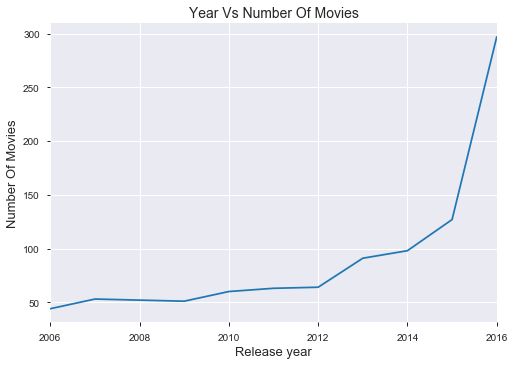

In [47]:
# make group for each year and count the number of movies in each year 

data = md.groupby('Year').count()["Title"]
print(data.tail())


##make group of the data according to their release year and count the total number of movies in each year and plot.
md.groupby("Year").count()['Title'].plot(xticks = np.arange(2006,2017,2))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")


### 5.2. Movie with Highest And Lowest Earned Revenue


In [48]:
#use the function 'idmin' to find the index of lowest revenue of movie.
#use the function 'idmax' to find the index of Highest revenue of  movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest revenue movie.
    min_index = md[x].idxmin()
    #use the function 'idmax' to find the index of Highest revenue movie.
    high_index = md[x].idxmax()
    high = pd.DataFrame(md.loc[high_index,:])
    low = pd.DataFrame(md.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "  " : ",md['Title'][high_index])
    print("Movie Which Has Lowest " "  : ",md['Title'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax("Revenue (Millions)")


Movie Which Has Highest  :  Star Wars: Episode VII - The Force Awakens
Movie Which Has Lowest   :  A Kind of Murder


,50,231
Rank,51,232
Title,Star Wars: Episode VII - The Force Awakens,A Kind of Murder
Genre,"Action,Adventure,Fantasy","Crime,Drama,Thriller"
Director,J.J. Abrams,Andy Goddard
Actors,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...","Patrick Wilson, Jessica Biel, Haley Bennett, V..."
Year,2015,2016
Runtime (Minutes),136,95
Rating,8.1,5.2
Votes,661608,3305
Revenue (Millions),936.63,0


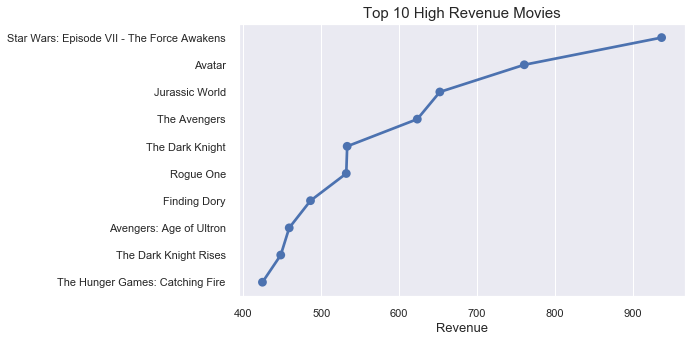

In [156]:
#top 10 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.

info = pd.DataFrame(md['Revenue (Millions)'].sort_values(ascending = False))
info['Title'] = md['Title']
data = list(map(str,(info['Title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['Revenue (Millions)'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

### 5.3. Movie with Longest And Shortest Runtime


In [132]:
#find the movie with longest and shortest runtime.
#so update zero with NAN in runtime column.
md['Runtime (Minutes)'] =md['Runtime (Minutes)'].replace(0,np.NAN)
find_minmax('Runtime (Minutes)')

Movie Which Has Highest  :  Grindhouse
Movie Which Has Lowest   :  Ma vie de Courgette


,828,793
Rank,829,794
Title,Grindhouse,Ma vie de Courgette
Director,Robert Rodriguez,Claude Barras
Actors,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell","Gaspard Schlatter, Sixtine Murat, Paulin Jacco..."
Year,2007,2016
Runtime (Minutes),191,66
Rating,7.6,7.8
Votes,160350,4370
Revenue (Millions),25.03,0.29
Metascore,NaN,85


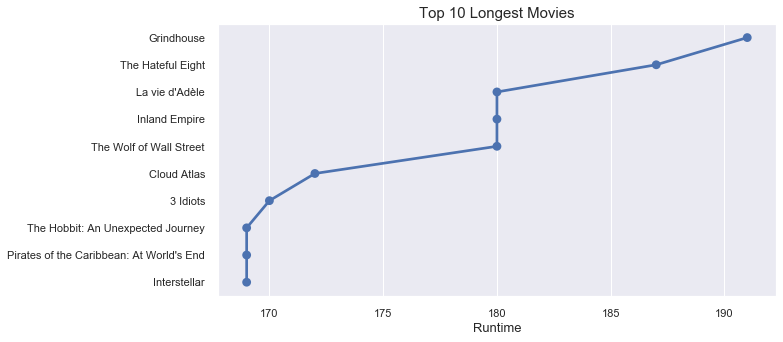

In [133]:
# Calculate Top 10 genre

info = pd.DataFrame(md['Runtime (Minutes)'].sort_values(ascending = False))
info['Title'] = md['Title']
data = list(map(str,(info['Title'])))

x = list(data[:10])
y = list(info['Runtime (Minutes)'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")


### 5.4. Movie with Highest Rating


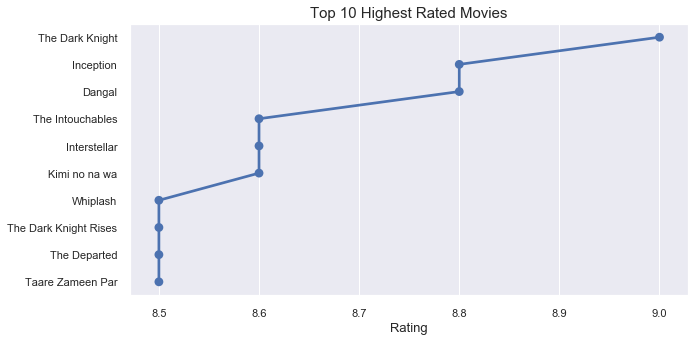

In [134]:
info = pd.DataFrame(md['Rating'].sort_values(ascending = False))
info['Title'] = md['Title']
data = list(map(str,(info['Title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['Rating'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Rating",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

### 5.5. Highest Revenue generated in a year

In [135]:
md.groupby('Year')['Revenue (Millions)'].sum().sort_values(ascending=False)

Year
2016    11211.65
2015     8854.12
2014     7997.40
2013     7666.72
2012     6910.29
2010     5989.65
2011     5431.96
2009     5292.26
2008     5053.22
2007     4306.23
2006     3624.46
Name: Revenue (Millions), dtype: float64

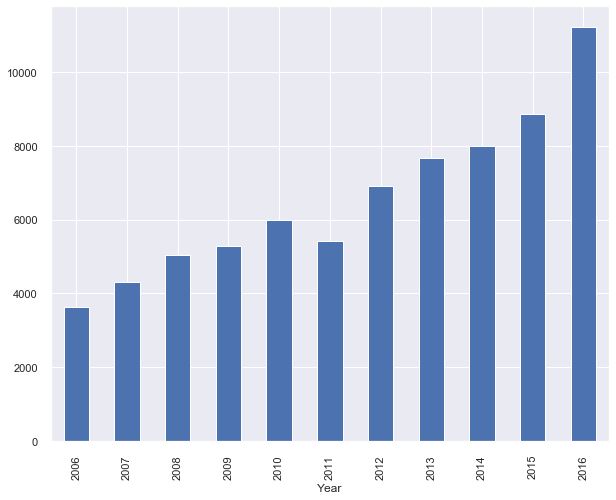

In [136]:
md.groupby('Year')['Revenue (Millions)'].sum().plot.bar()

### 5.6. Director whose movies have generated highest Revenues



In [137]:
md.groupby('Director')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10)

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
Joss Whedon          1082.27
Jon Favreau          1025.60
Zack Snyder           975.74
Peter Jackson         860.45
Gore Verbinski        829.82
Name: Revenue (Millions), dtype: float64

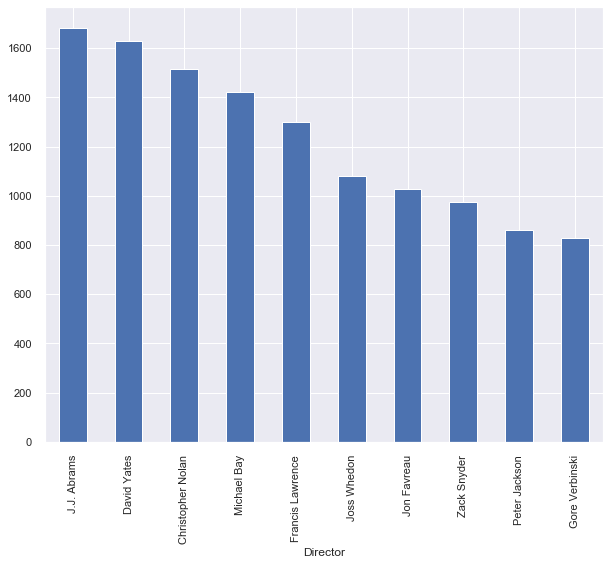

In [138]:
md.groupby('Director')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10).plot.bar()

### 5.7. Director who has directed highest number of movies


In [139]:
md['Director'].value_counts().head(10)

Ridley Scott          8
Michael Bay           6
David Yates           6
Paul W.S. Anderson    6
M. Night Shyamalan    6
Martin Scorsese       5
Justin Lin            5
Denis Villeneuve      5
Zack Snyder           5
Christopher Nolan     5
Name: Director, dtype: int64

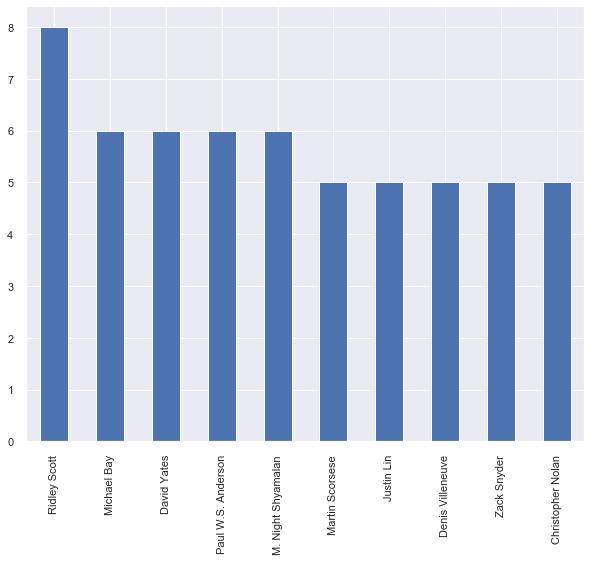

In [140]:
md['Director'].value_counts().head(10).plot.bar()


### 5.7. Correlation between Ranks, Votes & Metascore


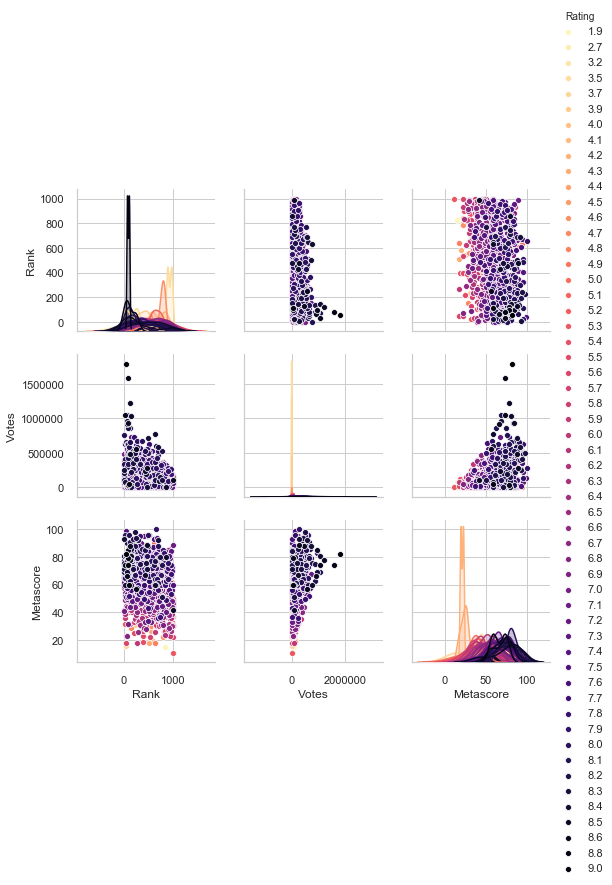

In [54]:
sns.pairplot(md, x_vars=['Rank', 'Votes', 'Metascore'], y_vars= ['Rank', 'Votes', 'Metascore'],  hue='Rating',palette='magma_r')


###  5.8. Top 5  Genre wise movie released in the Year (2006 -2016)

In [82]:
md = md.join(md.pop('Genre').str.get_dummies(','))
md

,Rank,Title,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,...,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,...,0,0,0,1,0,1,0,0,0,0
2,3,Split,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,...,1,0,0,0,0,0,0,1,0,0
3,4,Sing,Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0,...,0,0,0,1,0,0,0,0,0,0
996,997,Hostel: Part II,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,...,1,0,0,0,0,0,0,0,0,0
997,998,Step Up 2: The Streets,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,...,0,1,0,0,1,0,0,0,0,0
998,999,Search Party,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0,...,0,0,0,0,0,0,0,0,0,0


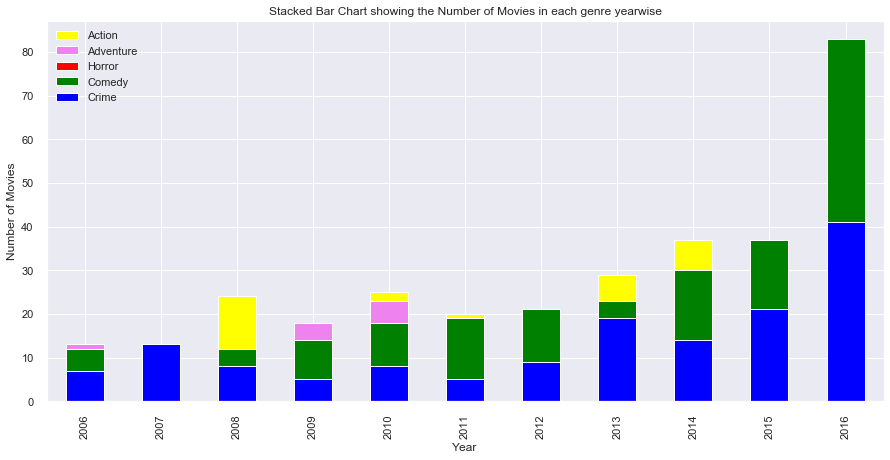

In [149]:
md[md.Action == 1].groupby(['Year'])['Action'].count().plot(kind='bar', figsize=(15, 7), color='yellow')
md[md.Adventure == 1].groupby(['Year'])['Adventure'].count().plot(kind='bar', figsize=(15, 7), color='Violet')
md[md.Horror == 1].groupby(['Year'])['Horror'].count().plot(kind='bar', figsize=(15, 7), color='red')
md[md.Comedy == 1].groupby(['Year'])['Comedy'].count().plot(kind='bar', figsize=(15, 7), color='Green')
md[md.Crime == 1].groupby(['Year'])['Crime'].count().plot(kind='bar', figsize=(15, 7), color='Blue')


plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Stacked Bar Chart showing the Number of Movies in each genre yearwise')
plt.legend(labels=('Action', 'Adventure', 'Horror', 'Comedy', 'Crime'))

In [157]:
md[md.Comedy == 1].groupby(['Year'])['Comedy'].count()

Year
2006    12
2007    10
2008    12
2009    14
2010    18
2011    19
2012    21
2013    23
2014    30
2015    37
2016    83
Name: Comedy, dtype: int64

### 5.9. Genre wise popularity over the years

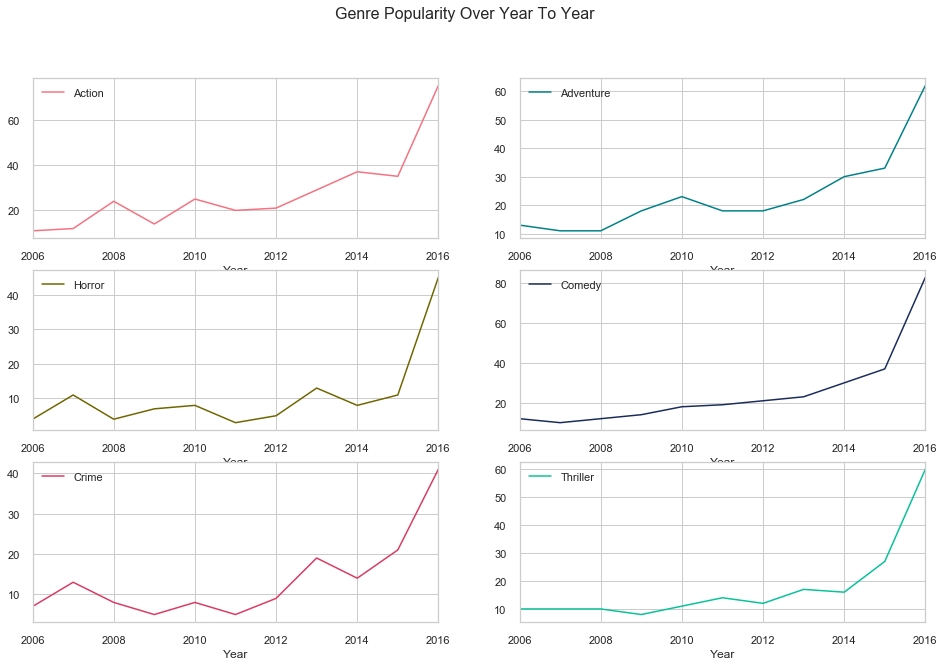

In [130]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,2.
fig, ax = plt.subplots(3,2,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

#plot the 'Drama' genre plot see the popularity difference over year to year.

md[md.Action == 1].groupby(['Year'])['Action'].count().plot(label = "Action",color = '#f67280',ax = ax[0][0],legend=True)

md[md.Adventure == 1].groupby(['Year'])['Adventure'].count().plot(label = "Adventure",color='#00818a',ax = ax[0][1],legend=True)

md[md.Horror == 1].groupby(['Year'])['Horror'].count().plot(label = "Horror",color='#6f6600',ax = ax[1][0],legend=True)

md[md.Comedy == 1].groupby(['Year'])['Comedy'].count().plot(label = "Comedy",color='#1a2c5b',ax = ax[1][1],legend=True)

md[md.Crime == 1].groupby(['Year'])['Crime'].count().plot(label = "Crime",color='#db3b61',ax = ax[2][0],legend=True)

md[md.Thriller == 1].groupby(['Year'])['Thriller'].count().plot(label = "Thriller",color='#08c299',ax = ax[2][1],legend=True)





## 6. Conclusions

#This study through a large volume of data, allowed me to determine the following points for movies between 2006 and 2016: 

- Maximum Number of Movies released in year 2016.
- Movie with Highest Revenue is Star Wars: Episode VII - The Force Awakens and Lowest Revenue is A Kind of Murder.
- Movie with Longest runtime is Grindhouse and Shortest runtime is  Ma vie de Courgette.
- Movies that have good ratings and critic score makes more money.
- Action, Adventure, Comedy, Crime, Thriller, Drama & Horror are the popular Genre which public prefers to watch more oftenly.
- Most of the movies runtime lies between 60 min to 120 min.


## 7. Actionable Insights

- Director should primarily focus on the storyline of the movie and should cast the actors accordingly.
- Technologies like CGI & VFX should be utilized in such a way that it creates an impression in the minds of audience and amaze them.
- Movies should not be stretched too long hours as the audience tends to loose the interest.